<h1>Arquivo de testes para o novo código</h1>

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from EnginneringForest import EnginneringForest

<h2>1. Teste com o dataset heart.csv</h2>

In [2]:
df_heart = pd.read_csv('heart.csv', engine='c', memory_map=True, low_memory=True)

X=df_heart[['age', 'sex', 'cp', 'trestbps',  'chol', 'fbs', 'restecg', 'thalach', 'exang', 
            'oldpeak', 'slope', 'ca', 'thal']]
# Labels
y=df_heart['target']

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, shuffle=True, stratify=y)

In [3]:
heart_accuracy_eg = []
heart_matrix_confusion_eg = []
n_estimators_eg = []
limit = int((X.shape[1] / 2) + 1)

for n_tree in range(limit):
    model_eg = EnginneringForest(select_features=n_tree+1, name_log='test_eg_{0}'.format(n_tree+1))
    model_eg.fit(X_train, y_train)
    y_pred = model_eg.predict(X_test)

    mac = accuracy_score(y_test, y_pred)
    mcm = confusion_matrix(y_test,y_pred)
    
    heart_accuracy_eg.append(mac)
    heart_matrix_confusion_eg.append(mcm)
    n_estimators_eg.append(len(model_eg.estimators_))
    
    print('Acuracia = {0}'.format(mac))
    print("Matriz de confusao \n{0}".format(str(mcm)))
    print("N arvores = {0}".format(n_estimators_eg))

    del model_eg

Acuracia = 0.7912087912087912
Matriz de confusao 
[[28 13]
 [ 6 44]]
N arvores = [13]
Acuracia = 0.8241758241758241
Matriz de confusao 
[[33  8]
 [ 8 42]]
N arvores = [13, 78]
Acuracia = 0.8351648351648352
Matriz de confusao 
[[33  8]
 [ 7 43]]
N arvores = [13, 78, 286]
Acuracia = 0.8241758241758241
Matriz de confusao 
[[32  9]
 [ 7 43]]
N arvores = [13, 78, 286, 715]
Acuracia = 0.8131868131868132
Matriz de confusao 
[[31 10]
 [ 7 43]]
N arvores = [13, 78, 286, 715, 1287]
Acuracia = 0.8131868131868132
Matriz de confusao 
[[30 11]
 [ 6 44]]
N arvores = [13, 78, 286, 715, 1287, 1716]
Acuracia = 0.7912087912087912
Matriz de confusao 
[[29 12]
 [ 7 43]]
N arvores = [13, 78, 286, 715, 1287, 1716, 1716]


In [4]:
# rodar o random forest
heart_accuracy_rf = []
heart_matrix_confusion_rf = []
n_estimators_rf = n_estimators_eg.copy()
n_estimators_rf.insert(2, 100)
for n_tree in n_estimators_rf:
    model_rf = RandomForestClassifier(n_estimators=n_tree, criterion='entropy')
    mrf_fit = model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)
    
    mac = accuracy_score(y_test, y_pred)
    mcm = confusion_matrix(y_test,y_pred)
    
    heart_accuracy_rf.append(mac)
    heart_matrix_confusion_rf.append(mcm)
    
    print('Acuracia = {0}'.format(mac))
    print("Matriz de confusao \n{0}".format(str(mcm)))
    print("N arvores = {0}".format(n_tree))

Acuracia = 0.8021978021978022
Matriz de confusao 
[[29 12]
 [ 6 44]]
N arvores = 13
Acuracia = 0.8021978021978022
Matriz de confusao 
[[29 12]
 [ 6 44]]
N arvores = 78
Acuracia = 0.7912087912087912
Matriz de confusao 
[[29 12]
 [ 7 43]]
N arvores = 100
Acuracia = 0.8021978021978022
Matriz de confusao 
[[29 12]
 [ 6 44]]
N arvores = 286
Acuracia = 0.8131868131868132
Matriz de confusao 
[[30 11]
 [ 6 44]]
N arvores = 715
Acuracia = 0.8021978021978022
Matriz de confusao 
[[29 12]
 [ 6 44]]
N arvores = 1287
Acuracia = 0.8021978021978022
Matriz de confusao 
[[29 12]
 [ 6 44]]
N arvores = 1716
Acuracia = 0.8021978021978022
Matriz de confusao 
[[29 12]
 [ 6 44]]
N arvores = 1716


In [5]:
for ax, ay in zip(zip(n_estimators_eg, heart_accuracy_eg), zip(n_estimators_rf, heart_accuracy_rf)):
    print("EG  = {0}, {1} \t RF = {2}, {3}".format(ax[0], ax[1], ay[0], ay[1]))

EG  = 13, 0.7912087912087912 	 RF = 13, 0.8021978021978022
EG  = 78, 0.8241758241758241 	 RF = 78, 0.8021978021978022
EG  = 286, 0.8351648351648352 	 RF = 100, 0.7912087912087912
EG  = 715, 0.8241758241758241 	 RF = 286, 0.8021978021978022
EG  = 1287, 0.8131868131868132 	 RF = 715, 0.8131868131868132
EG  = 1716, 0.8131868131868132 	 RF = 1287, 0.8021978021978022
EG  = 1716, 0.7912087912087912 	 RF = 1716, 0.8021978021978022


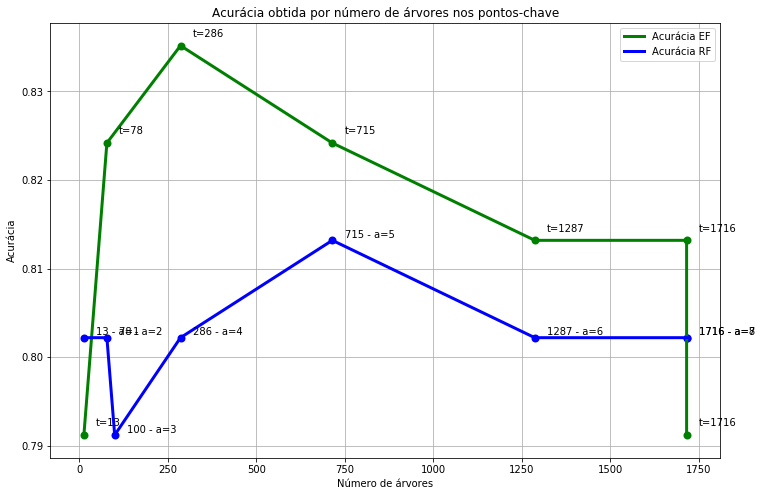

In [6]:
# compara os dois algoritmos para o dataset
eixo_x1 = n_estimators_eg
eixo_y1 = heart_accuracy_eg

eixo_x2 = n_estimators_rf
eixo_y2 = heart_accuracy_rf


plt.figure(figsize=(12,8))

plt.plot(eixo_x1, eixo_y1, color='green', linewidth=3.0, label='Acurácia EF')
plt.scatter(eixo_x1, eixo_y1, color='green', linewidth=2.0)
for i, txt in enumerate(eixo_x1):
    plt.annotate('t=' + str(txt), (eixo_x1[i]+35, eixo_y1[i]+0.001))
    #plt.text(x+.03, y+.03, word, fontsize=9)

plt.plot(eixo_x2, eixo_y2, color='blue', linewidth=3.0, label='Acurácia RF')
plt.scatter(eixo_x2, eixo_y2, color='blue', linewidth=2.0)
for i, txt in enumerate(eixo_x2):
    plt.annotate(str(txt) + ' - a=' + str(i+1), (eixo_x2[i]+35, eixo_y2[i]+0.0003))
    
plt.title('Acurácia obtida por número de árvores nos pontos-chave')
plt.xlabel('Número de árvores')
plt.ylabel('Acurácia')
plt.grid(True)
plt.legend();

<h2>2. Teste com o dataset biodeg.csv</h2>

In [26]:
columns = ['SpMax_L', 'J_Dz_e', 'nHM', 'F01_n_n', 'F04_c_n', 'NssssC', 'nCb', 'C', 'nCp', 'nO', 'F03_c_n', 
           'SdssC', 'HyWi_B_m', 'LOC', 'SM6_L', 'F03_c_o', 'Me', 'Mi', 'nN_N', 'nArNO2', 'nCRX3', 'SpPosA_B_p', 
           'nCIR', 'B01_c_br', 'B03c_cl', 'N_073', 'SpMax_A', 'Psi_i_1d', 'B04c_br', 'SdO', 'TI2_L', 'nCrt', 
           'C_026', 'F02_c_n', 'nHDon', 'SpMax_B_m', 'Psi_i_A', 'nN, SM6_B_m', 'nArCOOR', 'nX', 'class_experimental']
df_biodeg = pd.read_csv('biodeg.csv', 
                        sep=';', 
                        names=[name.lower() for name in columns],
                        engine='c', 
                        memory_map=True, 
                        low_memory=True)
columns_name = columns.copy()
del columns_name[-1]
X=df_biodeg[[name.lower() for name in columns_name]]
y=df_biodeg['class_experimental']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, shuffle=True, stratify=y)

In [29]:
set(y_train)

{'NRB', 'RB'}

In [28]:
biodeg_accuracy_eg = []
biodeg_matrix_confusion_eg = []
biodeg_n_estimators_eg = []
limit = int((X.shape[1] / 2) + 1)

print(limit)

for n_tree in range(limit):
    model_eg = EnginneringForest(select_features=n_tree+1, name_log='test_biodeg_{0}'.format(n_tree+1))
    model_eg.fit(X_train, y_train)
    y_pred = model_eg.predict(X_test)

    mac = accuracy_score(y_test, y_pred)
    mcm = confusion_matrix(y_test,y_pred)
    
    biodeg_accuracy_eg.append(mac)
    biodeg_matrix_confusion_eg.append(mcm)
    biodeg_n_estimators_eg.append(len(model_eg.estimators_))
    
    print('Passo = {0}'.format(n_tree+1))
    print('Acuracia = {0}'.format(mac))
    print("Matriz de confusao \n{0}".format(str(mcm)))
    print("N arvores = {0}".format(biodeg_n_estimators_eg))

    del model_eg

21


ValueError: Number of labels=3740 does not match number of samples=738